In [55]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
df=pd.read_excel("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\output.xlsx")
df.head()

,X,y
0,4.967142,-0.347171
1,-1.382643,-1.532612
2,6.476885,2.553014
3,15.230299,6.010595
4,-2.341534,-1.493338


### Understanding of Ridge and Lasso

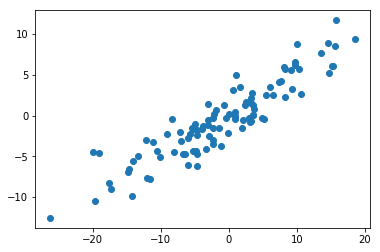

In [56]:
import matplotlib.pyplot as plt
plt.scatter(df["X"],df["y"])
plt.show()

In [57]:
import numpy as np

In [58]:
X=df["X"]
y=df["y"]

In [59]:
X=np.array(X)
y=np.array(y)

In [60]:
X=X.reshape(-1,1)

In [61]:
X.shape

(100, 1)

### Noraml Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
linreg=LinearRegression()

In [64]:
model=linreg.fit(X,y)

In [65]:
y_lin=model.intercept_+model.coef_*X

In [66]:
r2_score(y,y_lin)

0.8369317756103412

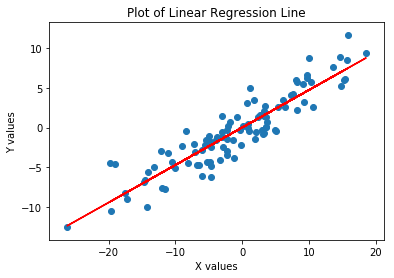

In [67]:
plt.plot(X,y_lin,color='red')
plt.scatter(X,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plot of Linear Regression Line")
plt.show()

### Adding Potencial outliers to check the performance of Linear Regression

In [68]:
idx=y.argmax()
y[idx]=200

In [69]:
idx=y.argmin()
y[idx]=-200

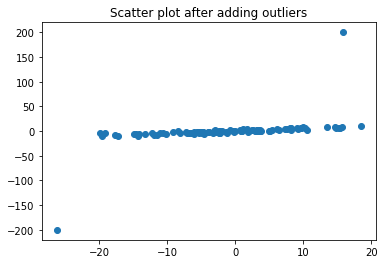

In [70]:
plt.scatter(X,y)
plt.title("Scatter plot after adding outliers")
plt.show()

In [71]:
reg=LinearRegression()

In [72]:
m=reg.fit(X,y)

In [73]:
ynew_lin=m.intercept_+m.coef_*X

In [74]:
m.intercept_

1.0265654583440769

#### Change in Regression line after adding outliers

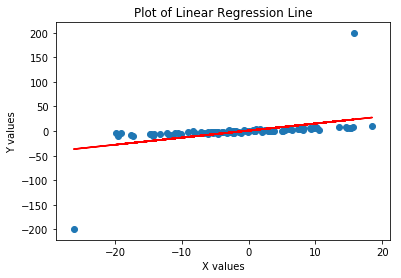

In [79]:
plt.plot(X,ynew_lin,color='red')
plt.scatter(X,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plot of Linear Regression Line")
plt.show()

In [80]:
r2_score(y,ynew_lin) #Considerble drop in R squared because of outliers

0.20597563652933104

### Applying Ridge Regression

In [81]:
ridge=Ridge(alpha=1000)

In [82]:
ridge_model=ridge.fit(X,y)

In [83]:
ridge_model.intercept_

0.8637303628672126

In [84]:
ridge_model.coef_

array([1.28033634])

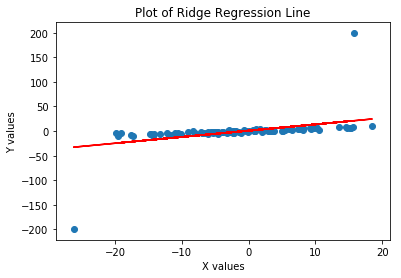

In [85]:
ynew_lin=ridge_model.intercept_+ridge_model.coef_*X
plt.plot(X,ynew_lin,color='red')
plt.scatter(X,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plot of Ridge Regression Line")
plt.show()

### Applying GridSearchCV on Ridge and Lasso

In [86]:
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\Consumo_cerveja.csv")
df=df.dropna()

In [87]:
def eliminate_comma(col):
    df[col]=df[col].str.replace(",",".")
    df[col]=df[col].astype(float)

In [88]:
df=df.drop(["Data"],1)

In [89]:
cols=["Temp Median","Temp Min","Temp Max","Percip","Weekend","Ltrs"]

In [90]:
df.columns=cols

In [91]:
df["Weekend"]=df["Weekend"].astype('category')

In [92]:
eliminate_comma("Temp Median")

In [93]:
eliminate_comma("Temp Min")

In [94]:
eliminate_comma("Temp Max")

In [95]:
eliminate_comma("Percip")

In [96]:
params={"alpha":np.arange(0.2,2,0.1)}

In [97]:
ridge_cv=GridSearchCV(ridge_reg,param_grid=params,cv=10)

In [98]:
scaler=MinMaxScaler()

In [99]:
df_cols=list(df)

In [100]:
df1=pd.DataFrame(scaler.fit_transform(df))

In [101]:
df1.columns=df_cols

In [102]:
X=df1.drop(["Ltrs"],1)
y=df["Ltrs"]

In [103]:
model=ridge_cv.fit(X,y)

In [104]:
model.best_estimator_

Ridge(alpha=0.30000000000000004, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
model.best_score_

0.629335220474967

In [106]:
model.error_score

'raise-deprecating'

In [107]:
lasso=Lasso()

In [108]:
lasso_params={"alpha":np.arange(0.1,2,0.1)}

In [109]:
lasso_cv=GridSearchCV(lasso,param_grid=lasso_params,cv=10)

In [110]:
lasso_model=lasso_cv.fit(X,y)

In [111]:
lasso_model.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
lasso_model.best_score_

0.579535174882323

In [113]:
X=df.drop(["Ltrs"],1)
y=df["Ltrs"]

In [114]:
elastic=ElasticNet(normalize=True)

In [115]:
elastic_params={"alpha":np.arange(0,5),"l1_ratio":np.arange(0.1,0.9,0.1)}

In [116]:
elastic_cv=GridSearchCV(elastic,param_grid=elastic_params,cv=10)

In [120]:
elastic_cv.estimator

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### Application of indivisual CV model of Ridge, Lasso and ElasticNet using RidgeCV,LassoCV,ElasticNetCV respectively

In [123]:
reg=RidgeCV()

In [124]:
reg.fit(X,y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [125]:
print(reg.score(X,y))

0.7225995691802635


In [126]:
lasso_reg=LassoCV()

In [127]:
lasso_reg.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [128]:
lasso_reg.score(X,y)

0.718774736636774

In [129]:
lasso_reg.alpha_ #Ratio of L1 and L2

0.12172649474197783

In [130]:
elastic_reg=ElasticNetCV()

In [131]:
elastic_reg.fit(X,y)

ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [132]:
elastic_reg.score(X,y)

0.7204610486657068